In [1]:
import random
import torch
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer
from scipy.io import loadmat
import yaml

sys.path.append("../")


from models import  FNN_train, compute_2dFourier_bases, compute_2dpca_bases, count_params
from models.myGkNN6 import myGkNN6

torch.set_printoptions(precision=16)


torch.manual_seed(0)
np.random.seed(0)


###################################
# load configs
###################################
with open('config.yml', 'r', encoding='utf-8') as f:
    config = yaml.full_load(f)

config = config["airfoil_HGkNN"]
config = dict(config)
config_data, config_model, config_train = (
    config["data"],
    config["model"],
    config["train"],
)
downsample_ratio = config_data["downsample_ratio"]
L = config_data["L"]
n_train = config_data["n_train"]
n_test = config_data["n_test"]
device = torch.device(config["train"]["device"])


###################################
# load data
###################################
data_path = "../data/airfoil/"
coordx = np.load(data_path+"NACA_Cylinder_X.npy")
coordy = np.load(data_path+"NACA_Cylinder_Y.npy")
data_in = np.stack((coordx, coordy), axis=3)
data_out = np.load(data_path+"NACA_Cylinder_Q.npy")[:,4,:,:] #density, velocity 2d, pressure, mach number

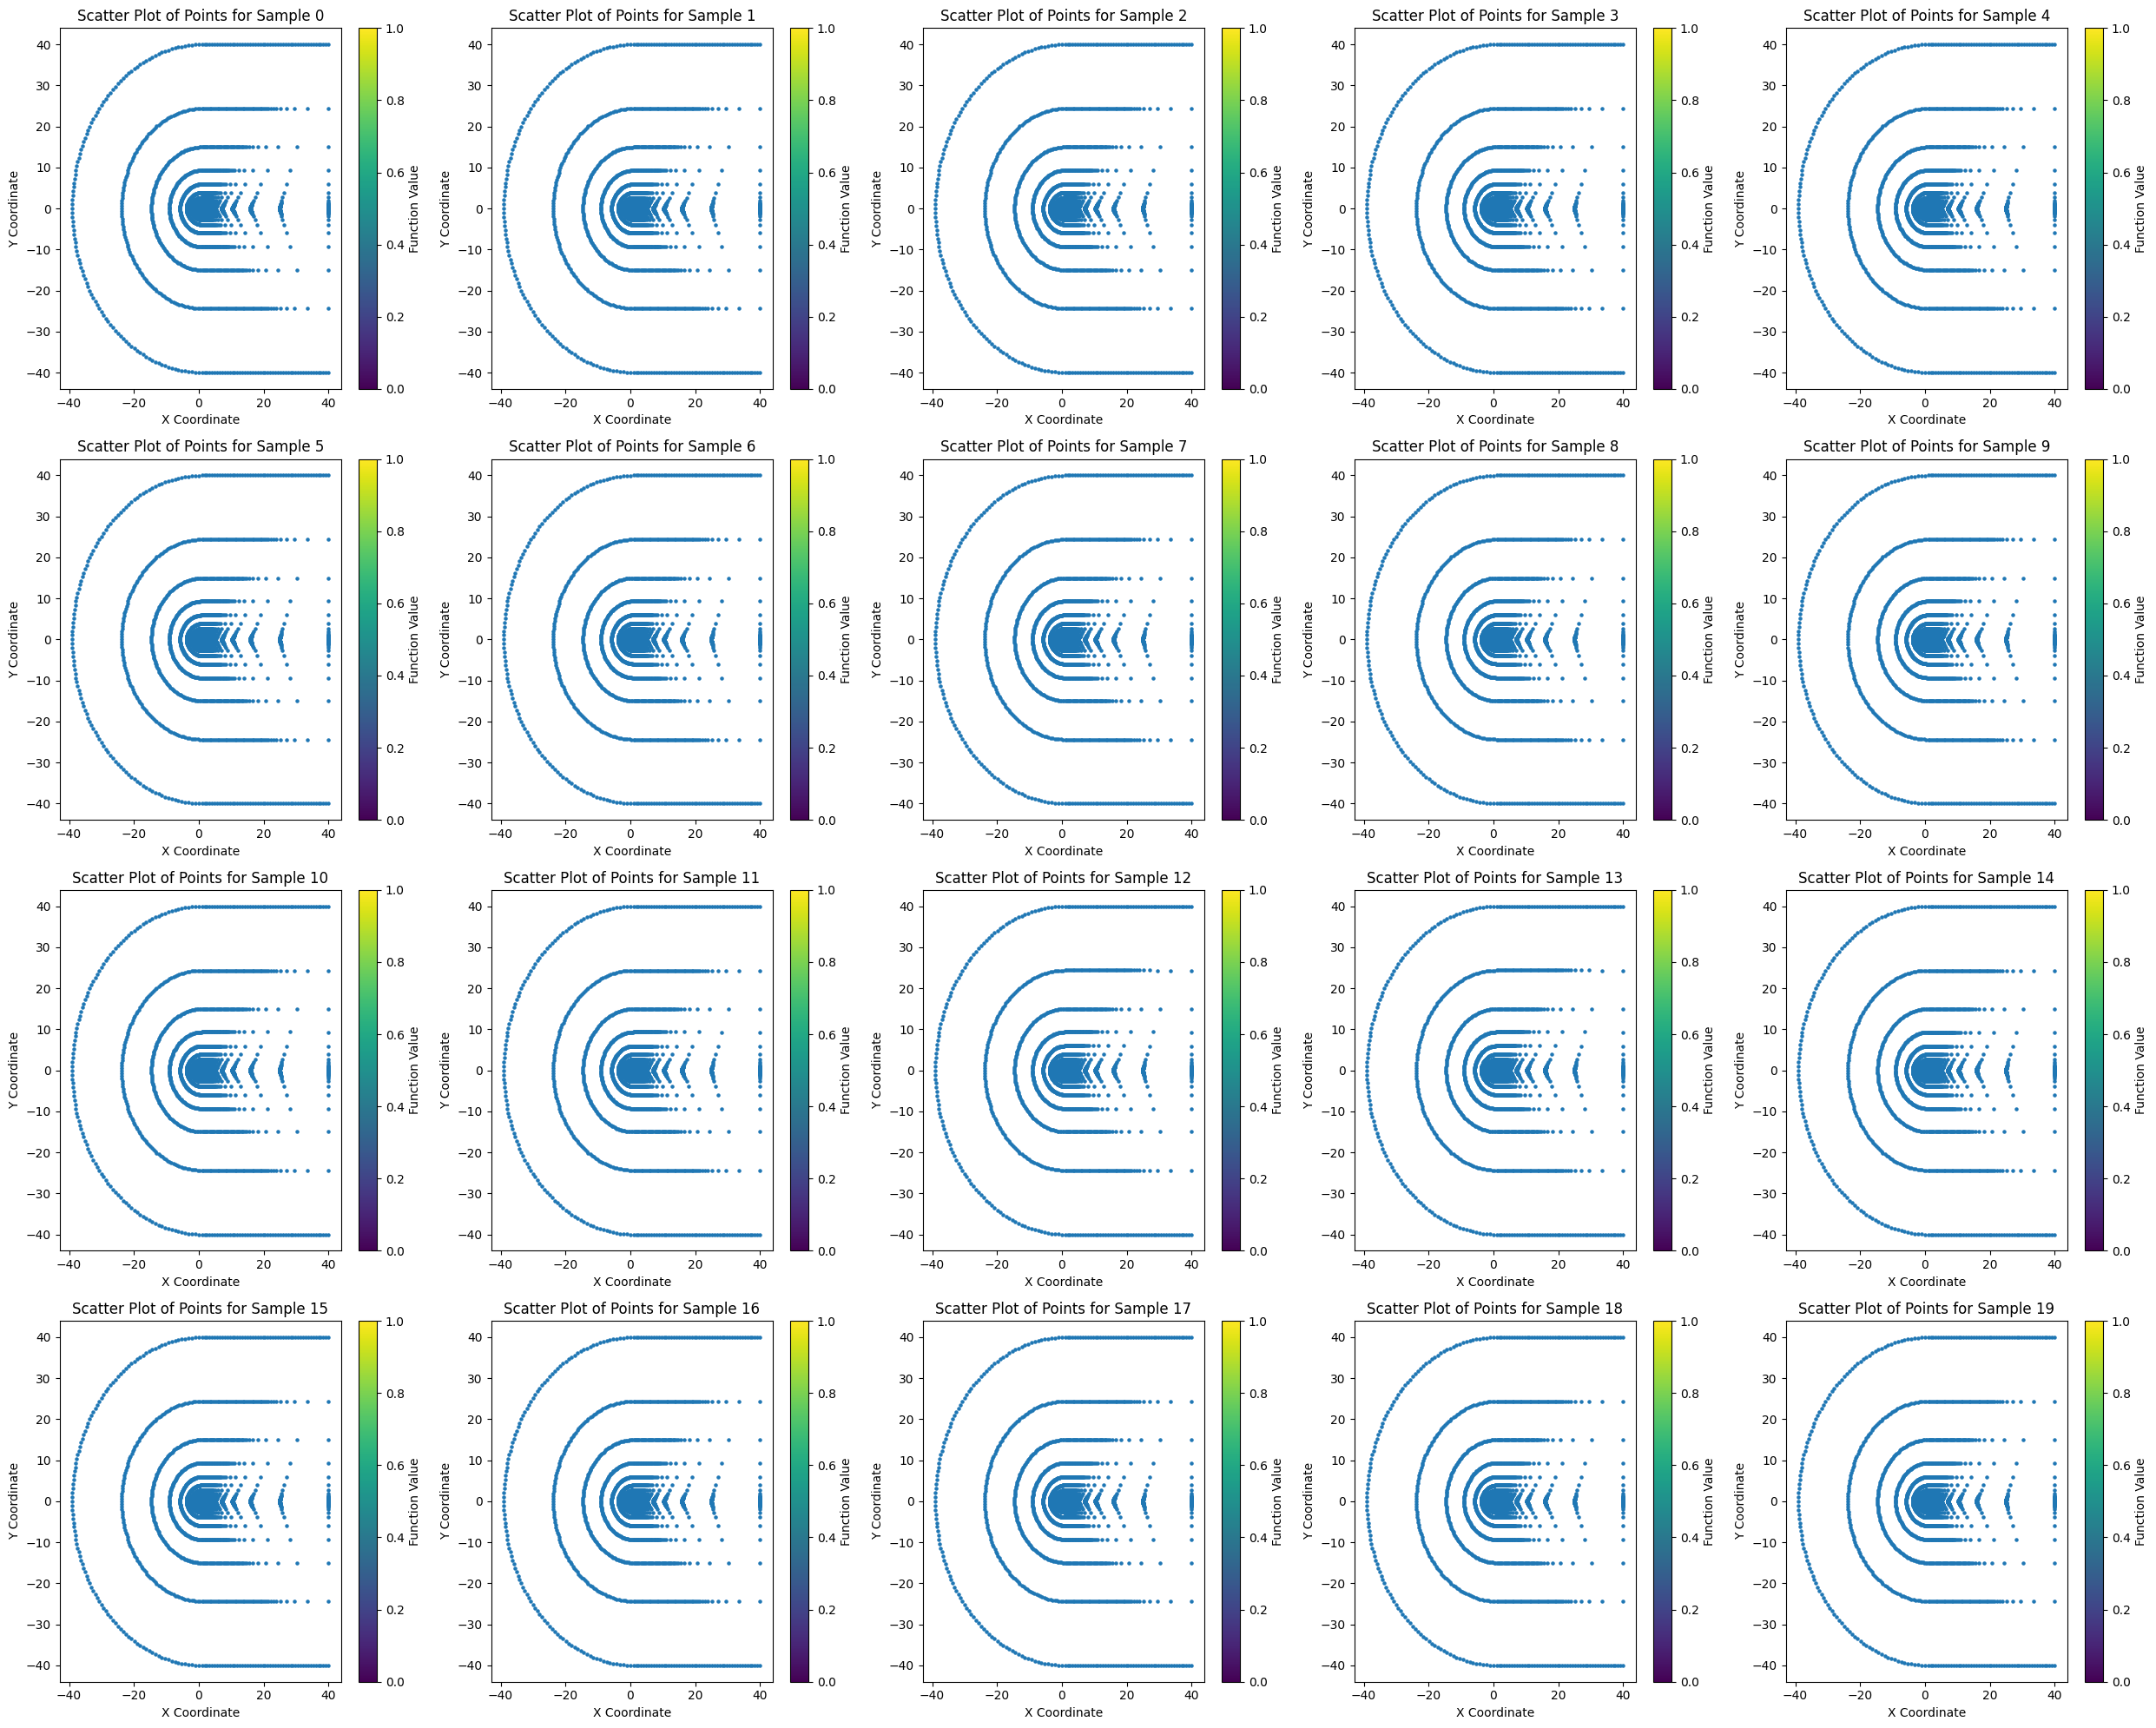

In [16]:
%matplotlib inline

n = 20
# 创建一个包含多个子图的图形
fig, axs = plt.subplots(4, 5, figsize=(5*5, 5 * 4))
xmin, xmax = -100, 100
ymin, ymax = -100, 100

# 定义函数 f(x, y)
def f(x, y,x0,y0,w):
    return 1/w*np.exp(-w*(x-x0)**2-w*(y-y0)**2)
x0 = 0
y0 = 0
w = 50
for i in range(n):
    points = data_in[i]
    x_coords = points[:, :, 0].flatten()
    y_coords = points[:, :, 1].flatten()

    mask = (x_coords >= xmin) & (x_coords <= xmax) & (y_coords >= ymin) & (y_coords <= ymax)
    filtered_x = x_coords[mask]
    filtered_y = y_coords[mask]
    
    # 计算函数值
    function_values = f(filtered_x, filtered_y,x0,y0,w)

    current_ax = axs[i//5, i-5*(i//5)]

    # 使用不同的颜色或大小来表示函数值
    # scatter = current_ax.scatter(filtered_x, filtered_y, c=function_values, cmap='viridis', s=5)
    scatter = current_ax.scatter(filtered_x, filtered_y, s=5)
    # 添加颜色条来表示函数值
    # fig.colorbar(scatter, ax=current_ax, label='Function Value')

    current_ax.set_title(f'Scatter Plot of Points for Sample {i}')
    current_ax.set_xlabel('X Coordinate')
    current_ax.set_ylabel('Y Coordinate')

plt.tight_layout()  # 自动调整子图布局
plt.show()

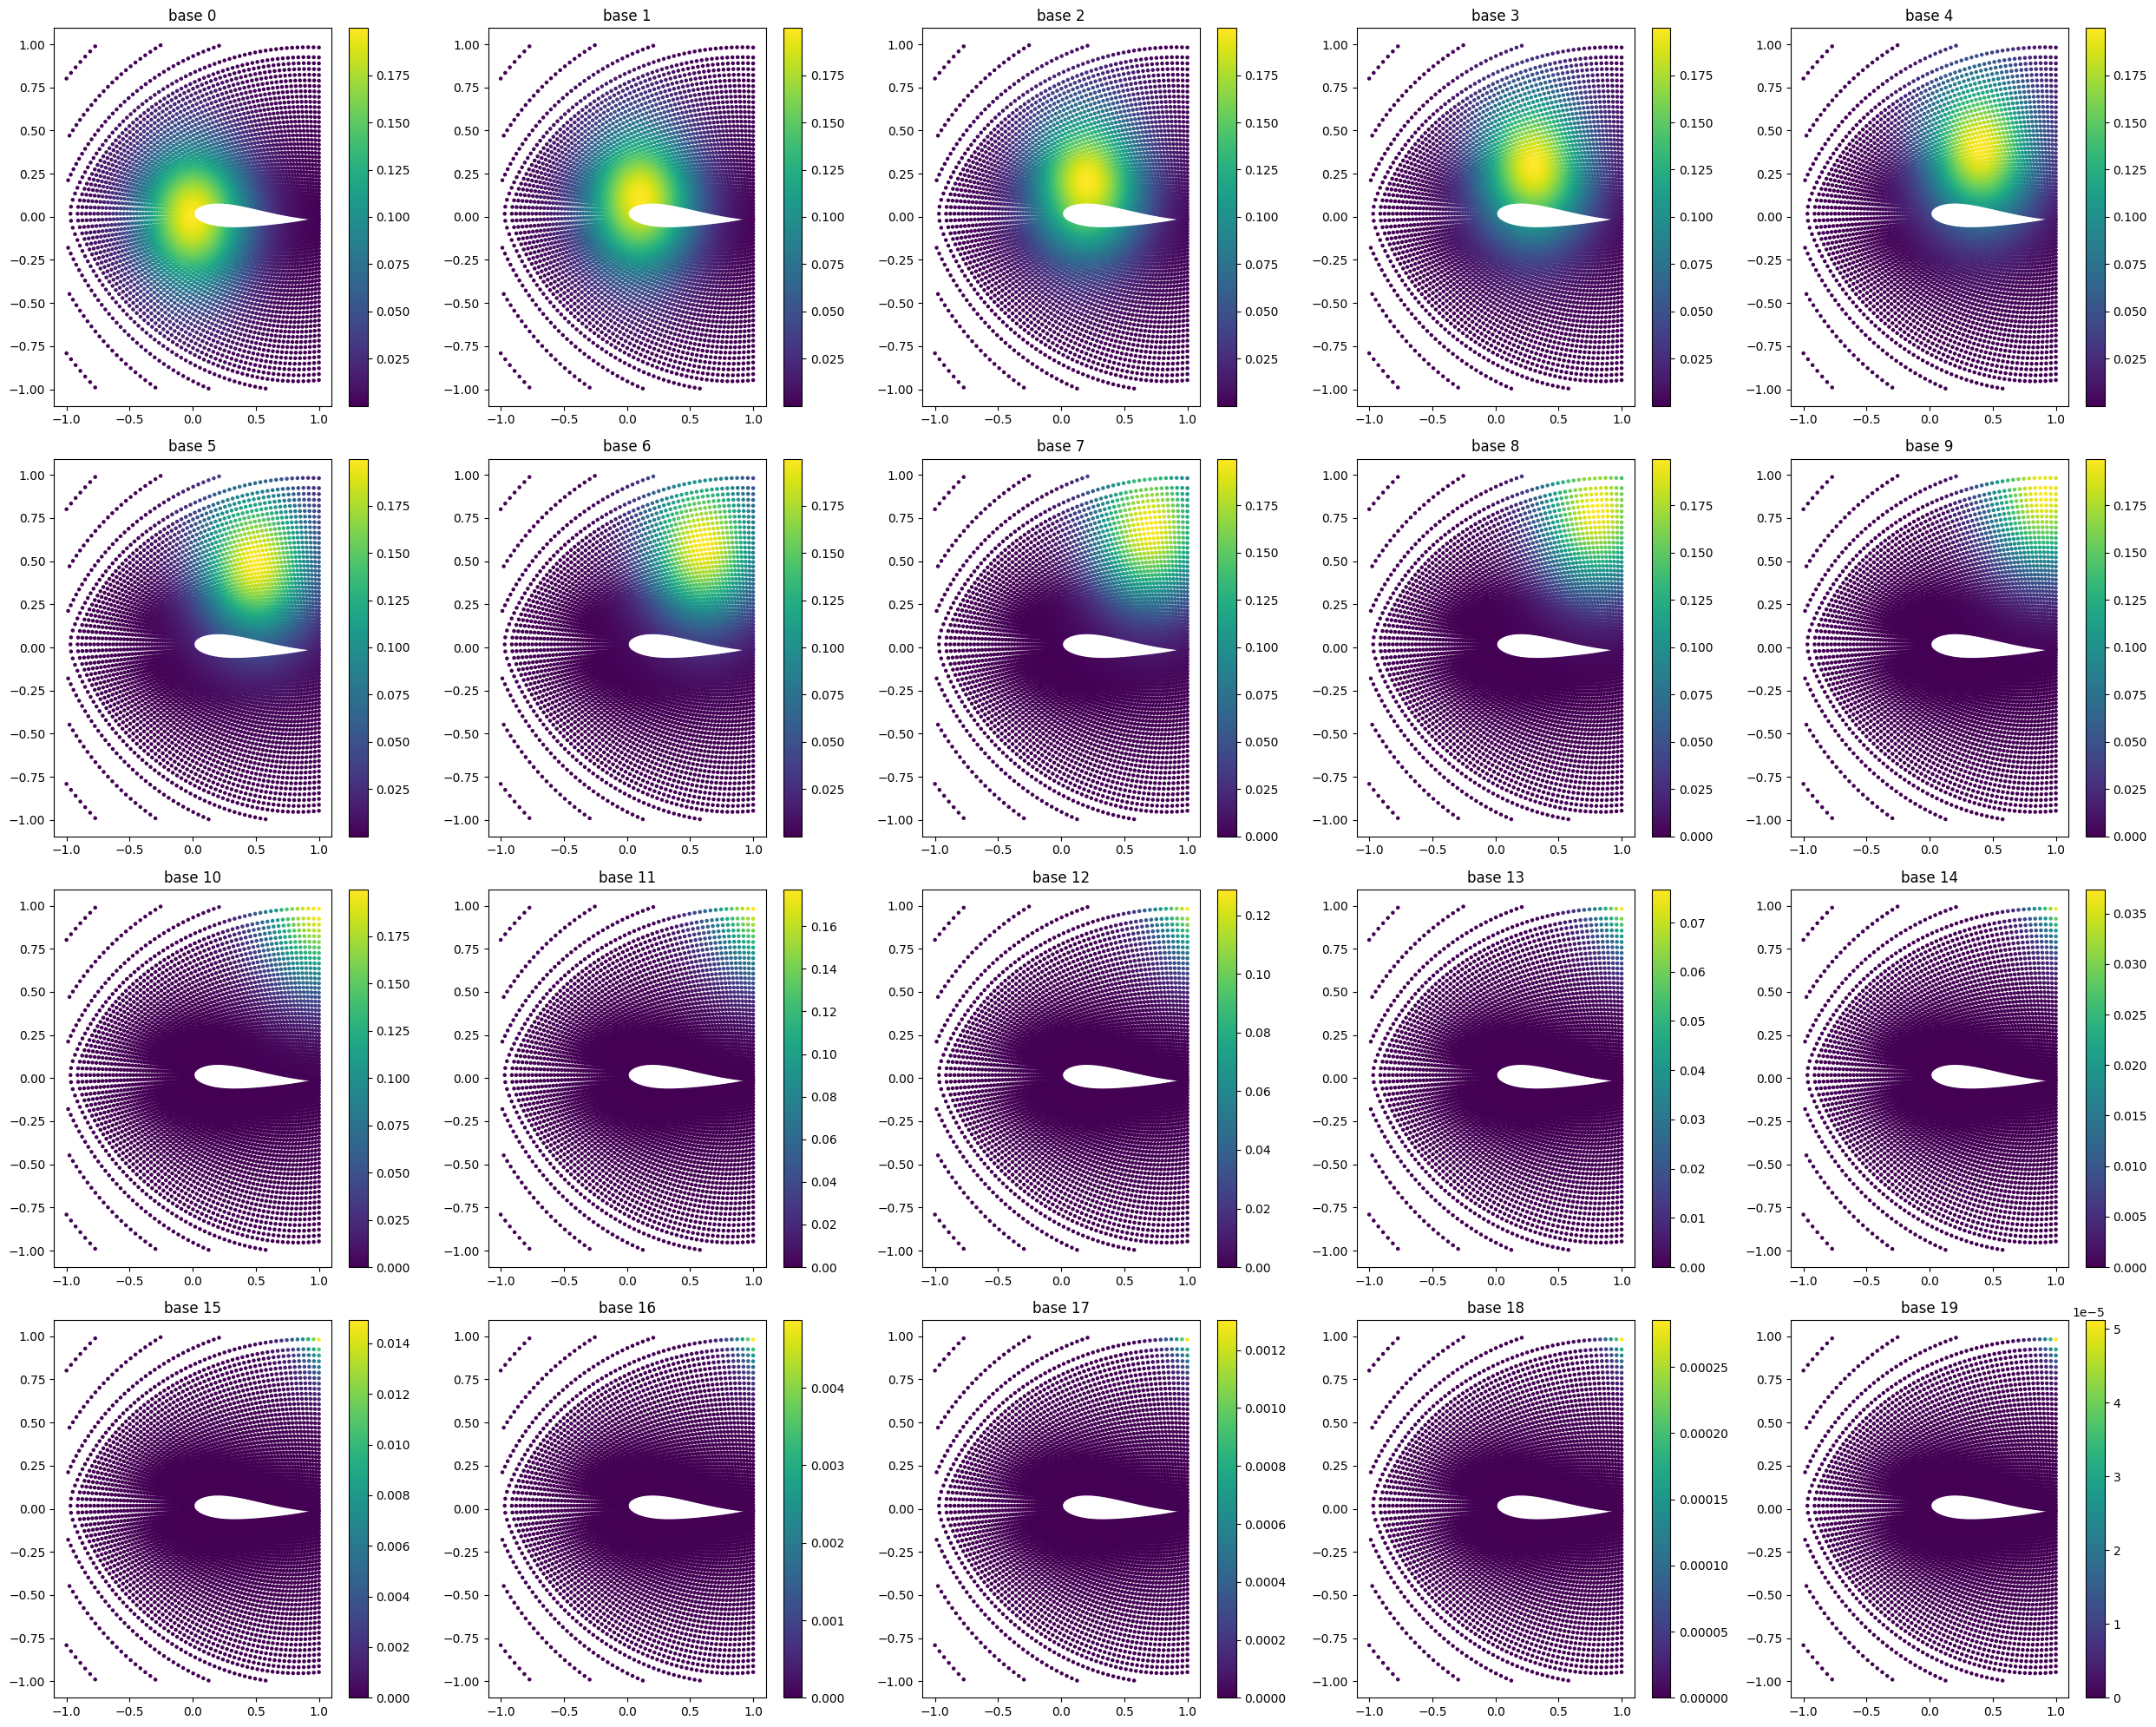

In [14]:
%matplotlib inline

n = 20
# 创建一个包含多个子图的图形
fig, axs = plt.subplots(4, 5, figsize=(5*5, 5 * 4))
xmin, xmax = -1, 1
ymin, ymax = -1, 1

# 定义函数 f(x, y)
def f(x, y,x0,y0,w):
    return 1/w*np.exp(-w*(x-x0)**2-w*(y-y0)**2)
x0 = 0
y0 = 0
w = 5
points = data_in[0]
x_coords = points[:, :, 0].flatten()
y_coords = points[:, :, 1].flatten()

mask = (x_coords >= xmin) & (x_coords <= xmax) & (y_coords >= ymin) & (y_coords <= ymax)
filtered_x = x_coords[mask]
filtered_y = y_coords[mask]
for i in range(n):
    xi = x0+i*0.1
    yi = y0+i*0.1
    # 计算函数值
    function_values = f(filtered_x, filtered_y,xi,yi,w)

    current_ax = axs[i//5, i-5*(i//5)]

    # 使用不同的颜色或大小来表示函数值
    scatter = current_ax.scatter(filtered_x, filtered_y, c=function_values, cmap='viridis', s=5)
    
    # 添加颜色条来表示函数值
    fig.colorbar(scatter, ax=current_ax)

    current_ax.set_title(f'base {i}')

plt.tight_layout()  # 自动调整子图布局
plt.show()